In [ ]:
#!pip install scikit-plot

In [ ]:
import pandas as pd
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_ml_features.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859553,1.709161,129.0,2019
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019


In [ ]:
X = df.drop(columns=['PRICE'],axis =1).values
y = df['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestRegressor(random_state=42) 

In [ ]:
param_grid = { 
    'n_estimators': [950],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [30],
    'bootstrap': [False]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [False], 'max_depth': [30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [950]})

In [ ]:
CV_rfc.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 950}

In [ ]:
rfc = RandomForestRegressor(n_estimators=950, max_features='sqrt', max_depth=30, bootstrap=False, random_state=42) 

In [ ]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=950, random_state=42)

In [ ]:
prediction = rfc.predict(X_test)
print(prediction)

[13.31037186 13.03492928 13.02898414 ... 13.10923944 14.39810965
 12.98393105]


In [ ]:
r2_score(y_test, prediction)

0.8598011083679455

In [ ]:
mean_squared_error(y_test, prediction)

0.03645184028077497

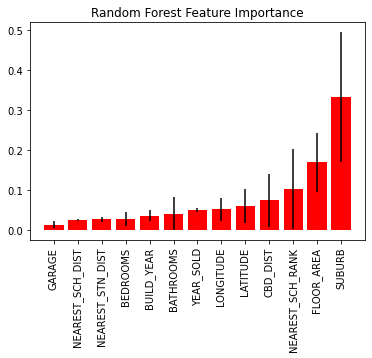

In [ ]:
skplt.estimators.plot_feature_importances(rfc, feature_names=df.drop(columns=['PRICE'],axis =1).columns,
                                         title="Random Forest Feature Importance",
                                         x_tick_rotation=90, order="ascending");